<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-projects/blob/main/SalaryPrediction40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [400]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [401]:
salary = pd.read_csv("/content/train.csv")
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [402]:
data = salary.copy()
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


**DATA PREPROCESSING**

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [404]:
data = data.drop("GrossPay", axis=1)
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00


In [405]:
#data.columns = [i.strip() for i in data.columns ]
data.columns = data.columns.str.strip()
data.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary'], dtype='object')

In [406]:
data.isna().sum()

Name             0
JobTitle         0
AgencyID         0
Agency           0
HireDate        70
AnnualSalary     0
dtype: int64

In [407]:
data = data[data["HireDate"].isnull() == False]
data.isna().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [408]:
data["JobTitle"].value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [409]:
data["AgencyID"].value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [410]:
data["Agency"].value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [411]:
data["HireDate"].value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

In [412]:
data["AnnualSalary"].value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$58227.00       1
$41704.00       1
$44700.00       1
$43000.00       1
$900.00         1
Name: AnnualSalary, Length: 1590, dtype: int64

In [413]:
def remove_dollar(x):
  return int(float(x[1:]))

data["AnnualSalary"] = data["AnnualSalary"].apply(remove_dollar)
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104


In [414]:
data["AnnualSalary"].value_counts()

11310    4811
20800     325
29245     196
43999     169
44773     162
         ... 
58227       1
41704       1
44700       1
43000       1
900         1
Name: AnnualSalary, Length: 1590, dtype: int64

In [415]:
data["HireDate"] = pd.to_datetime(data["HireDate"])
data["Year"]= data["HireDate"].dt.year
data["Month"] = data["HireDate"].dt.month
data["Week"] = data["HireDate"].dt.week
data["Week_day"] = data["HireDate"].dt.weekday
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999,2013,7,30,2
...,...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,2014-05-21,11310,2014,5,21,2
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,2014-05-21,11310,2014,5,21,2
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,2013-12-17,43999,2013,12,51,1
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,2013-01-23,44104,2013,1,4,2


In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          18911 non-null  object        
 1   JobTitle      18911 non-null  object        
 2   AgencyID      18911 non-null  object        
 3   Agency        18911 non-null  object        
 4   HireDate      18911 non-null  datetime64[ns]
 5   AnnualSalary  18911 non-null  int64         
 6   Year          18911 non-null  int64         
 7   Month         18911 non-null  int64         
 8   Week          18911 non-null  int64         
 9   Week_day      18911 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.6+ MB


In [417]:
data.sort_values(by = "HireDate", ascending = False)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
17747,"Webb,Ciara",RECREATION ARTS INSTRUCTOR,P04001,R&P-Recreation (part-ti,2014-06-28,20800,2014,6,26,5
9820,"Knight,LaTanya",COMMUNITY AIDE,P04002,R&P-Recreation (part-ti,2014-06-27,20800,2014,6,26,4
9402,"Jones,Taela B",SWIMMING POOL ATTENDENT,P04002,R&P-Recreation (part-ti,2014-06-26,15080,2014,6,26,3
14564,"Ross,Magira E",TEMP SUMMER EMP MOMR,W07900,Youth Temp Adult,2014-06-26,24960,2014,6,26,3
6494,"Goodwyn,Jermaine",RECREATION ARTS INSTRUCTOR,P04001,R&P-Recreation (part-ti,2014-06-26,15080,2014,6,26,3
...,...,...,...,...,...,...,...,...,...,...
1005,"Bavato,Nancy A",SECRETARY III,A30001,Law Department,1965-01-25,47382,1965,1,4,0
18952,"Zemon,Wayne",SURVEY TECHNICIAN IV,A49106,TRANS-Highways,1963-12-10,58313,1963,12,50,1
18026,"Whitt,Sadie E",OFFICE ASST III,A75058,Enoch Pratt Free Library,1962-04-03,38195,1962,4,14,1
18778,"Wright,Howard F",CONTRACT ADMINISTRATOR II,A41102,DPW-Administration,1961-06-18,58313,1961,6,24,6


In [418]:
def modify_col(x):
  return x.strip().lower().replace("  ","")

In [419]:
data["AgencyID"] = data["AgencyID"].apply(modify_col)
data["JobTitle"] = data["JobTitle"].apply(modify_col)
data["Agency"] = data["Agency"].apply(modify_col)
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",aide blue chip,w02200,youth summer,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",facilities/office services ii,a03031,oed-employment dev,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",assistant state's attorney,a29005,states attorneys office,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",epidemiologist,a65026,hlth-health department,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",police officer trainee,a99416,police department,2013-07-24,43999,2013,7,30,2
...,...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",aide blue chip,w02235,youth summer,2014-05-21,11310,2014,5,21,2
18977,"Zotamou,Pivot D",aide blue chip,w02629,youth summer,2014-05-21,11310,2014,5,21,2
18978,"Zovistoski,Zachary D",police officer trainee,a99416,police department,2013-12-17,43999,2013,12,51,1
18979,"Zubyk,Stanislav T",police officer,a99262,police department,2013-01-23,44104,2013,1,4,2


<Axes: xlabel='AnnualSalary', ylabel='Density'>

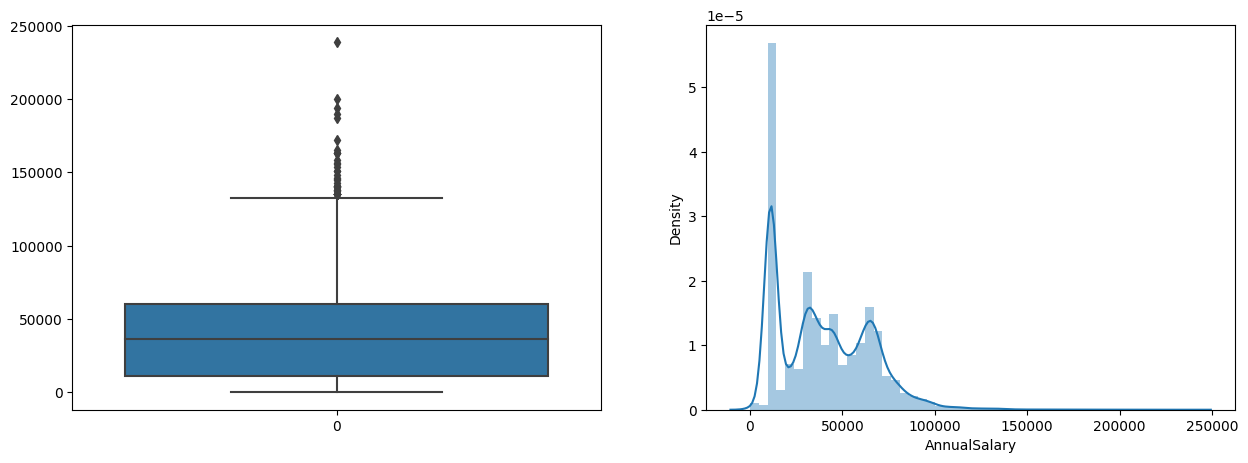

In [420]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data["AnnualSalary"])
plt.subplot(1,2,2)
sns.distplot(data["AnnualSalary"])

In [421]:
data["AnnualSalary"].describe()

count     18911.000000
mean      39660.421554
std       25163.466041
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [422]:
data = data[data["AnnualSalary"]<150000]
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",aide blue chip,w02200,youth summer,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",facilities/office services ii,a03031,oed-employment dev,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",assistant state's attorney,a29005,states attorneys office,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",epidemiologist,a65026,hlth-health department,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",police officer trainee,a99416,police department,2013-07-24,43999,2013,7,30,2
...,...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",aide blue chip,w02235,youth summer,2014-05-21,11310,2014,5,21,2
18977,"Zotamou,Pivot D",aide blue chip,w02629,youth summer,2014-05-21,11310,2014,5,21,2
18978,"Zovistoski,Zachary D",police officer trainee,a99416,police department,2013-12-17,43999,2013,12,51,1
18979,"Zubyk,Stanislav T",police officer,a99262,police department,2013-01-23,44104,2013,1,4,2


<Axes: xlabel='AnnualSalary', ylabel='Density'>

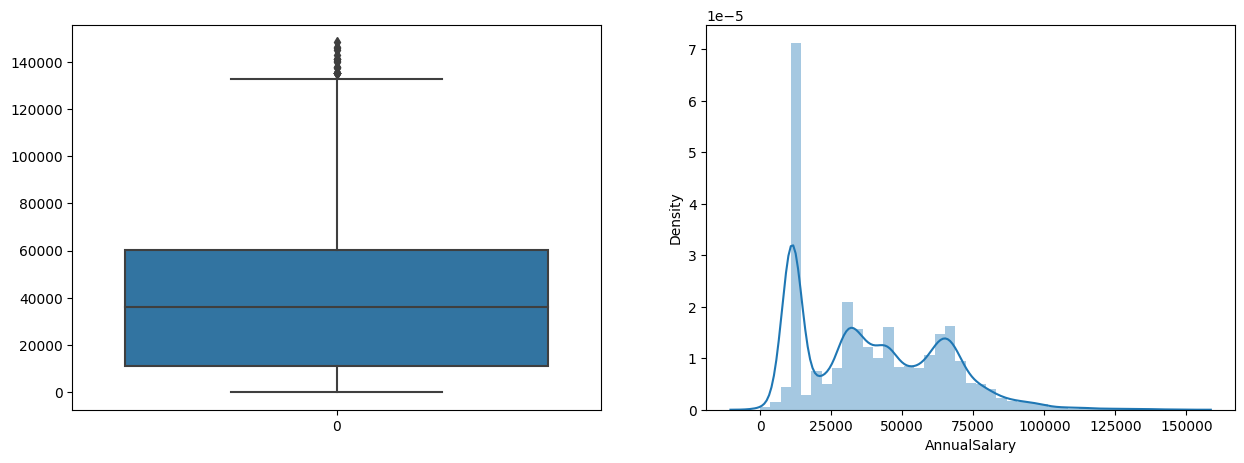

In [423]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data["AnnualSalary"])
plt.subplot(1,2,2)
sns.distplot(data["AnnualSalary"])

***DATA ANALYSIS***


**Top 10 jobs with highest hiring**

In [424]:
vc = data["JobTitle"].value_counts().head(10)
xaxis = list(vc.index)
yaxis = list(vc.values)
xaxis

['aide blue chip',
 'police officer',
 'laborer (hourly)',
 'crossing guard',
 'emt firefighter suppression',
 'community aide',
 'recreation arts instructor',
 'police officer (eid)',
 'police sergeant',
 'motor vehicle driver i']

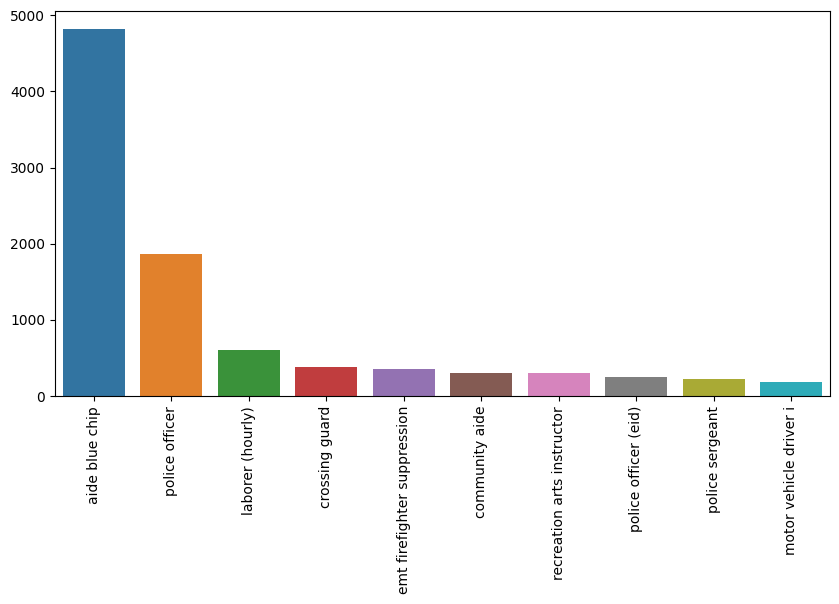

In [425]:
plt.figure(figsize=[10,5])
sns.barplot(x = xaxis, y = yaxis)
plt.xticks(rotation=90)
plt.show()

**Top 10 jobs with highest salaries**

In [426]:
hs = data.groupby("JobTitle")["AnnualSalary"].mean().sort_values(ascending=False).head(10)
x = hs.index
y = hs.values

<Axes: xlabel='JobTitle'>

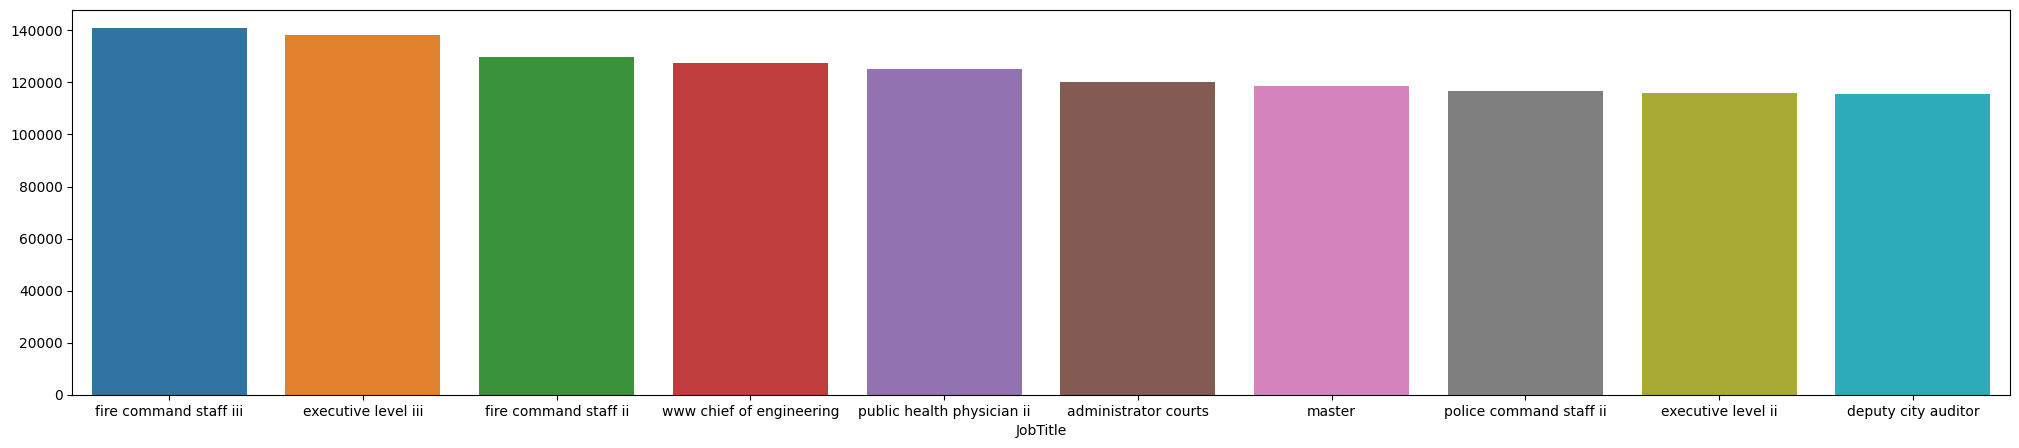

In [427]:
plt.figure(figsize=[25,5])
sns.barplot(x=x , y=y)

**Number of Jobs whose Salary is more that total average salary**

In [428]:
avgSal = data["AnnualSalary"].mean()
s = data.groupby("JobTitle")["AnnualSalary"].mean()
s[s>avgSal]
print(len(s [s>avgSal]))

798


**Top 10 Agencies with highest number of employees**

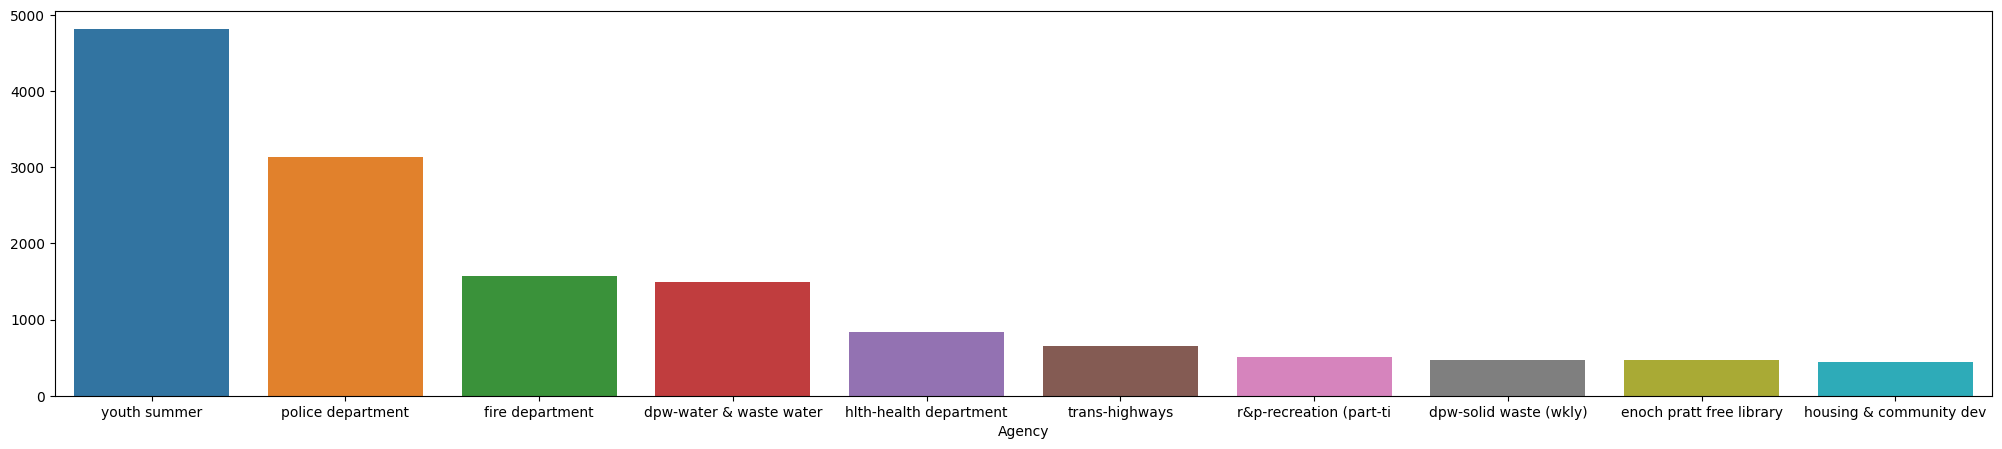

In [429]:
ag = data.groupby("Agency")["Name"].count().sort_values(ascending=False).head(10)
xaxis = ag.index
yaxis = ag.values
plt.figure(figsize=[25,5])
sns.barplot(x = xaxis, y = yaxis)
# plt.xticks(rotation=90)
plt.show()

**Top 10 AgenciesId with highest number of employees**

<Axes: xlabel='AgencyID'>

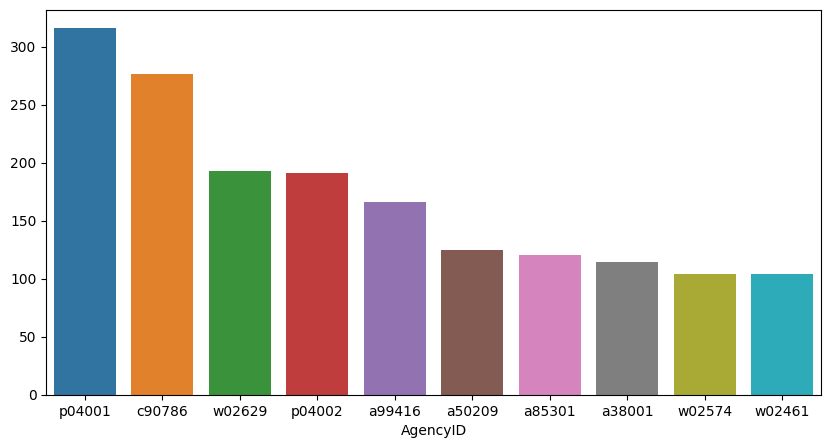

In [430]:
agId = data.groupby("AgencyID")["Name"].count().sort_values(ascending=False).head(10)
xaxis = agId.index
yaxis = agId.values
plt.figure(figsize=[10,5])
sns.barplot(x=xaxis , y= yaxis)

Let us check people hired in which year have lowest Salaries. This is to check if as the Hire Year increases the Salary decreases. Because, Salry is high for people who have high experience

<Axes: xlabel='Year'>

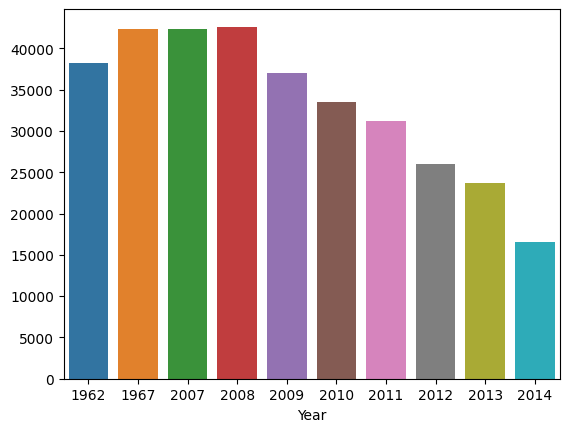

In [431]:
lsh= data.groupby(["Year"])["AnnualSalary"].mean().sort_values().head(10)
xaxis = lsh.index
yaxis = lsh.values
sns.barplot(x=xaxis, y = yaxis)

**Average Salary of Employees based on Hire Month**

<Axes: xlabel='Month'>

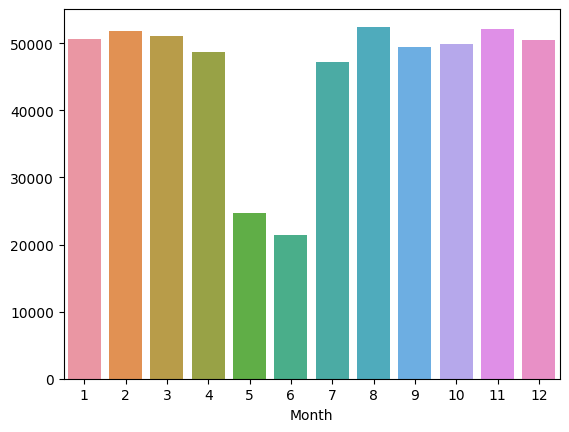

In [432]:
avg = data.groupby("Month")["AnnualSalary"].mean()
xaxis = avg.index
yaxis = avg.values
sns.barplot(x=xaxis, y= yaxis)

**Checking on which Month most people are hired**

<Axes: xlabel='Month'>

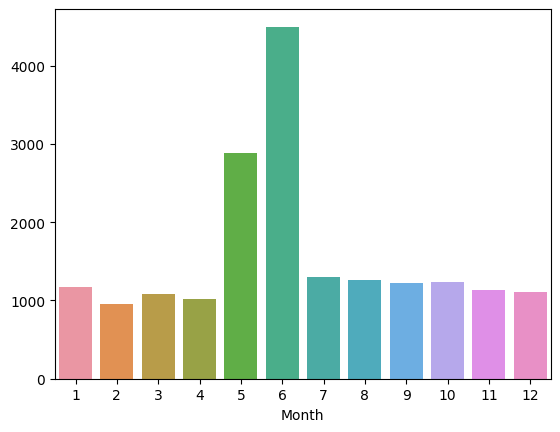

In [433]:
hm = data.groupby("Month")["Name"].count().sort_values(ascending = False)
xaxis = hm.index
yaxis = hm.values
sns.barplot(x=xaxis, y=yaxis)

**Relation between any of the Numerical variables**

<Figure size 1500x2000 with 0 Axes>

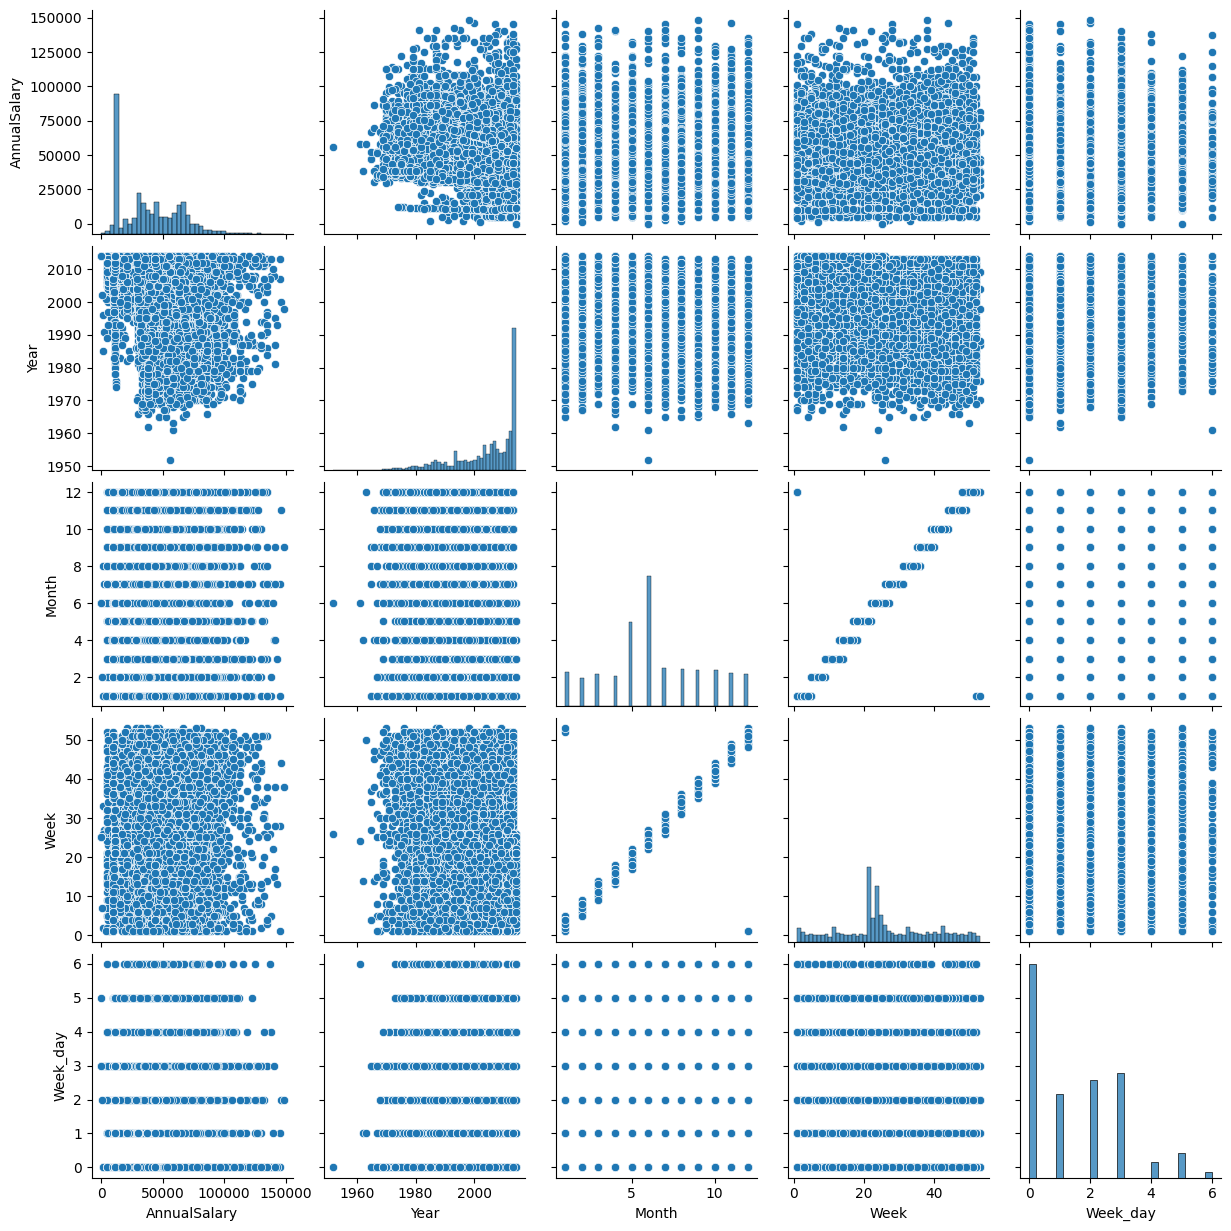

In [434]:
plt.figure(figsize=(15,20))
sns.pairplot(data)
plt.show()

<Axes: >

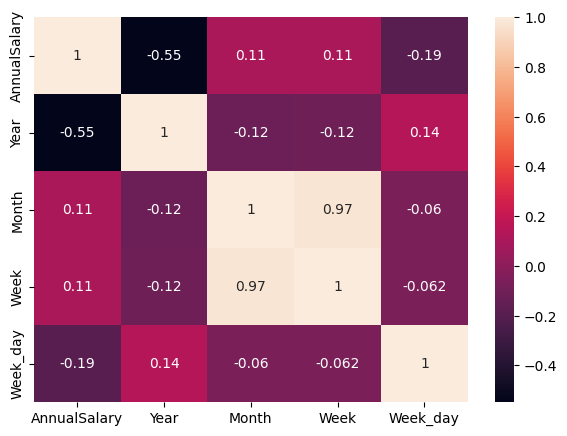

In [435]:
plt.figure(figsize=[7,5])
sns.heatmap(data.corr(), annot = True)

In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          18895 non-null  object        
 1   JobTitle      18895 non-null  object        
 2   AgencyID      18895 non-null  object        
 3   Agency        18895 non-null  object        
 4   HireDate      18895 non-null  datetime64[ns]
 5   AnnualSalary  18895 non-null  int64         
 6   Year          18895 non-null  int64         
 7   Month         18895 non-null  int64         
 8   Week          18895 non-null  int64         
 9   Week_day      18895 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.1+ MB


# ***MODEL BUILDING***

In [437]:
data = data[data["AnnualSalary"]>0]
data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",aide blue chip,w02200,youth summer,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",facilities/office services ii,a03031,oed-employment dev,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",assistant state's attorney,a29005,states attorneys office,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",epidemiologist,a65026,hlth-health department,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",police officer trainee,a99416,police department,2013-07-24,43999,2013,7,30,2


In [438]:
# Mean encoding for JobTitle
avg_sl_job = data.groupby("JobTitle")["AnnualSalary"].mean()
mean_encoding = {i:avg_sl_job[i] for i in avg_sl_job.index}
data["JobTitle"] = data["JobTitle"].map(mean_encoding)
data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",11313.967200,w02200,youth summer,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",47443.500000,a03031,oed-employment dev,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",69750.666667,a29005,states attorneys office,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",57940.000000,a65026,hlth-health department,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",44531.160494,a99416,police department,2013-07-24,43999,2013,7,30,2


In [439]:
# Mean encoding for AgencyID
avg_sl_job = data.groupby("AgencyID")["AnnualSalary"].mean()
mean_encoding = {i:avg_sl_job[i] for i in avg_sl_job.index}
data["AgencyID"] = data["AgencyID"].map(mean_encoding)
data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",11313.967200,11310.000000,youth summer,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",47443.500000,46667.000000,oed-employment dev,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",69750.666667,65926.133333,states attorneys office,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",57940.000000,48071.851064,hlth-health department,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",44531.160494,44012.307229,police department,2013-07-24,43999,2013,7,30,2


In [440]:
# Mean encoding for Agency
avg_sl_job = data.groupby("Agency")["AnnualSalary"].mean()
mean_encoding = {i:avg_sl_job[i] for i in avg_sl_job.index}
data["Agency"] = data["Agency"].map(mean_encoding)
data.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Year,Month,Week,Week_day
0,"Aaron,Keontae E",11313.967200,11310.000000,11313.967200,2013-06-10,11310,2013,6,24,0
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,1979-10-24,53428,1979,10,43,2
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,2006-09-25,68300,2006,9,39,0
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,2009-07-23,62000,2009,7,30,3
4,"Abbene,Anthony M",44531.160494,44012.307229,61506.879579,2013-07-24,43999,2013,7,30,2


In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 18980
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          18870 non-null  object        
 1   JobTitle      18870 non-null  float64       
 2   AgencyID      18870 non-null  float64       
 3   Agency        18870 non-null  float64       
 4   HireDate      18870 non-null  datetime64[ns]
 5   AnnualSalary  18870 non-null  int64         
 6   Year          18870 non-null  int64         
 7   Month         18870 non-null  int64         
 8   Week          18870 non-null  int64         
 9   Week_day      18870 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 1.6+ MB


In [442]:
x = (data.drop(["Name","HireDate"],axis=1))
y = np.log10(data["AnnualSalary"])

In [443]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state= 45)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [445]:
parameters = { "criterion":("squared_error", "absolute_error", "friedman_mse", "poisson"),
              "warm_start" : (True, False),
               "max_depth" : (45,12,15,5),
               "bootstrap" :(True, False),
               "random_state":(12,45,85,36,63)}

In [446]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [447]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator = rfr, param_distributions = parameters, n_jobs=-1)
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': (True, False),
                                        'criterion': ('squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'),
                                        'max_depth': (45, 12, 15, 5),
                                        'random_state': (12, 45, 85, 36, 63),
                                        'warm_start': (True, False)})

In [448]:
rs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=15, random_state=63)

In [451]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor(criterion='absolute_error', max_depth=15, random_state=63)
rfr1.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=15, random_state=63)

In [452]:
y_pred_train = rfr1.predict(x_train)
y_pred_test = rfr1.predict(x_test)

In [453]:
from sklearn.metrics import mean_absolute_error, r2_score
print("TRAIN\n")
print("train_mae: ", mean_absolute_error(y_train, y_pred_train))
print("train_r2_score: ", r2_score(y_train, y_pred_train))
print("TEST\n")
print("test_mae: ", mean_absolute_error(y_test, y_pred_test))
print("test_r2_score: ", r2_score(y_test, y_pred_test))

TRAIN

train_mae:  3.84137364536907e-05
train_r2_score:  0.9999765415146452
TEST

test_mae:  5.299554847657189e-05
test_r2_score:  0.999997583445659


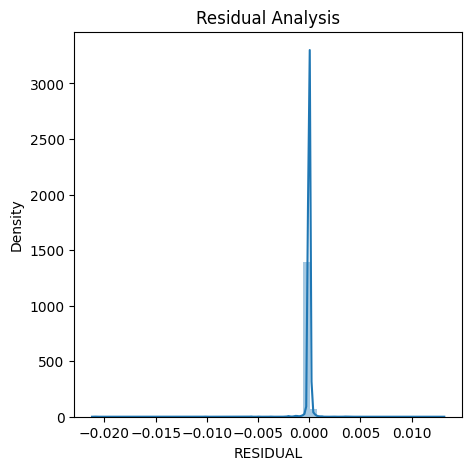

In [458]:
residual = y_test-y_pred_test
plt.figure(figsize=[5,5])
sns.distplot(residual)
plt.xlabel("RESIDUAL")
plt.title("Residual Analysis")
plt.show()

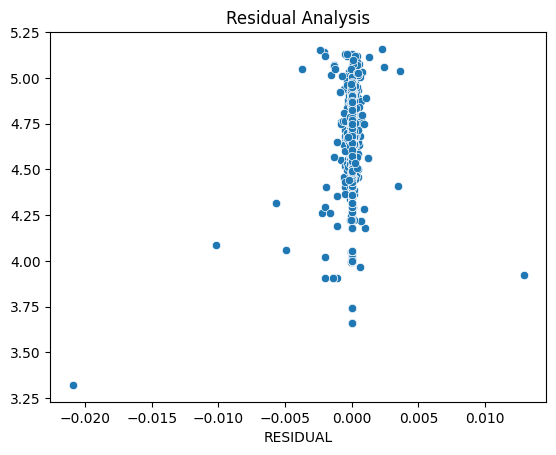

In [459]:
sns.scatterplot(x = residual, y = y_pred_test)
plt.xlabel("RESIDUAL")
plt.title("Residual Analysis")
plt.show()